# Requirements

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import os
import cv2
import glob
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


# Load the images

In [2]:
# Define the path to the directory containing the images
path = "/home/stanley/Documents/facerecognition/FR"

labels = ['Stanley','Madonna']
# Load the images and labels into arrays
images = []
image_labels = []
for label in labels:
    image_paths = [os.path.join(path, label, f) for f in os.listdir(os.path.join(path, label)) if f.endswith('.jpg')]
    for image_path in image_paths:
        img = cv2.imread(image_path,0)
        img = cv2.resize(img, (200, 200)) # Resize the image to 200 x 200 pixels
        images.append(img)
        image_labels.append(label)

# Convert the image and label arrays to NumPy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# Normalize and make it One Dimension

In [3]:
#Normalize the image array, the image vector values will be between 0 and 1. Convert to numpy array to perform mathematical expressions.

#convert the image into 1D array, 
image_vectors = np.array([img.flatten() for img in images])
print(image_vectors.shape)

mean = np.mean(image_vectors, axis=0)
std = np.std(image_vectors, axis=0)

# normalize the image vectors by subtracting the mean and dividing by the standard deviation
image_vectors_norm = (image_vectors - mean) / std

# image_vectors.shape

(31, 40000)


# Perform PCA

(31, 31)


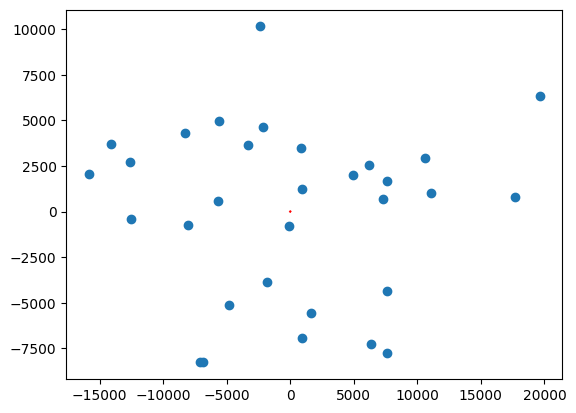

In [4]:
# create a PCA object
pca = PCA(n_components=31)  # set the number of components you want to keep

# fit the PCA model to the image vectors
pca.fit(image_vectors)

# transform the image vectors to their low-dimensional representation
image_vectors_transformed = pca.transform(image_vectors)
print(image_vectors_transformed.shape)
# plot the transformed data with the first two principal components as the x and y axes
plt.scatter(image_vectors_transformed[:, 0], image_vectors_transformed[:, 1])

# plot the first principal component as a line passing through the scatter plot
x = np.linspace(-5, 5)
y = x * pca.components_[0, 1] / pca.components_[0, 0]
plt.plot(x, y, color='r')

plt.show()

# KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_vectors_transformed, image_labels, test_size=0.2, random_state=42)

# Create a kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Print the accuracy of the classifier
print("Accuracy:", np.mean(y_pred == y_test))


Accuracy: 0.7142857142857143


# Viola Jones

In [6]:
# Open the default camera
cap = cv2.VideoCapture(0)

while True:
    # Read the next frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame using the Haar cascade classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # For each detected face, recognize the person and draw a rectangle around the face
    for (x, y, w, h) in faces:
        # Crop the detected face from the frame and resize it to the same size as the face images used during training
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (200, 200))

        # Apply the same PCA transformation to the cropped and resized face to get the feature vector for that face
        face_vector = face_resized.flatten().reshape(1, -1)
        face_vector_transformed = pca.transform(face_vector)

        # Use the kNN classifier to predict the identity of the person based on the feature vector
        predicted_label = knn.predict(face_vector_transformed)[0]

        # Draw a rectangle around the detected face and display the predicted label on the rectangle
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, predicted_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow("Recognition", frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/stanley/.local/lib/python3.10/site-packages/cv2/qt/plugins"
